<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/Day_30_Function_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer



In [4]:
df=pd.read_csv('/content/titanic.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-7-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [8]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [9]:
X_train,X_test,y_train,y_test = (train_test_split(X,y,test_size=0.2,random_state=42))

# PDF and QQ plot of Age

<ipython-input-10-5578040358b9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


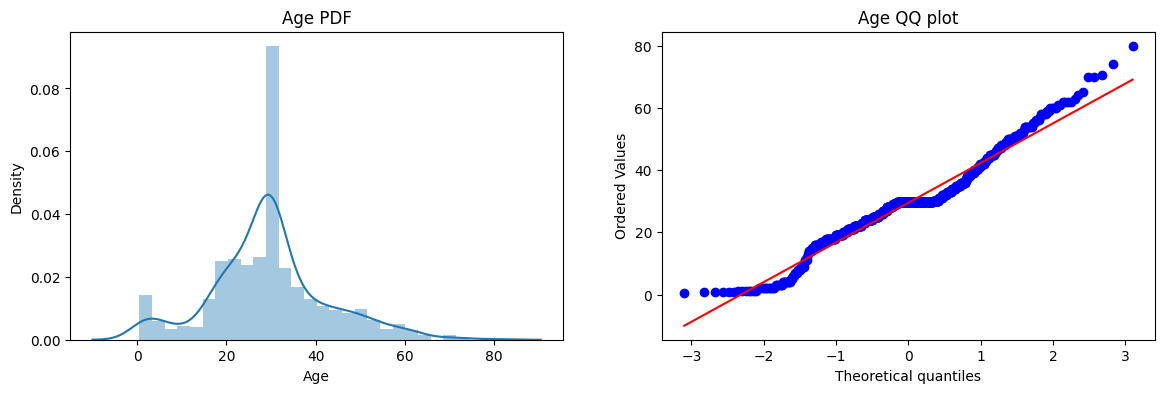

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

close to normal distribution not perfect

# PDF and QQ plot of Fare

<ipython-input-11-9a65e8efc68f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


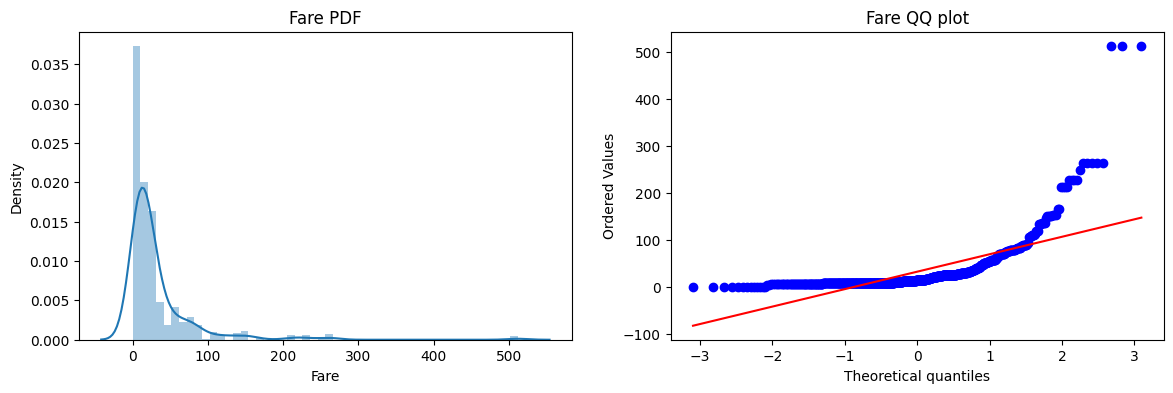

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show()

it right skewed dist we can apply log transformation


# Accuracy with out Transformation

In [12]:
clf1=LogisticRegression()
clf2 = DecisionTreeClassifier()

In [13]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)

print("Accuracy of LR =",accuracy_score(y_test,y_pred1))
print("Accuracy of DT =",accuracy_score(y_test,y_pred2))

Accuracy of LR = 0.6480446927374302
Accuracy of DT = 0.659217877094972


# Accuracy when log transformation apply

In [14]:
trf = FunctionTransformer(np.log1p)

In [15]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [16]:
clf11=LogisticRegression()
clf22 = DecisionTreeClassifier()

clf11.fit(X_train_transformed,y_train)
clf22.fit(X_train_transformed,y_train)

y_pred11=clf11.predict(X_test_transformed)
y_pred22=clf22.predict(X_test_transformed)

print("Accuracy of LR =",accuracy_score(y_test,y_pred11))
print("Accuracy of DT =",accuracy_score(y_test,y_pred22))

Accuracy of LR = 0.6815642458100558
Accuracy of DT = 0.6927374301675978


 decision tree accuracy not change bec decision tree have not impact of distribution of data
 logistic regression accuracy increase

 # cross validation

In [17]:
X_transformed= trf.fit_transform(X)

clf1=LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Accuracy of LR =",cross_val_score(clf1,X_transformed,y,cv=5).mean())
print("Accuracy of DT =",cross_val_score(clf2,X_transformed,y,cv=5).mean())

Accuracy of LR = 0.6780114242671521
Accuracy of DT = 0.6498462117883371


# QQ plot Before Transformation and After Transformation

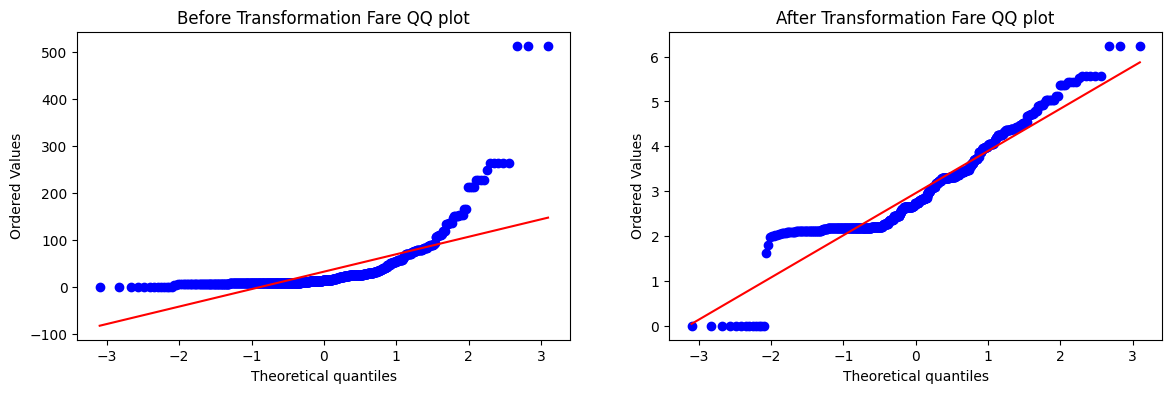

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Before Transformation Fare QQ plot')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('After Transformation Fare QQ plot')

plt.show()

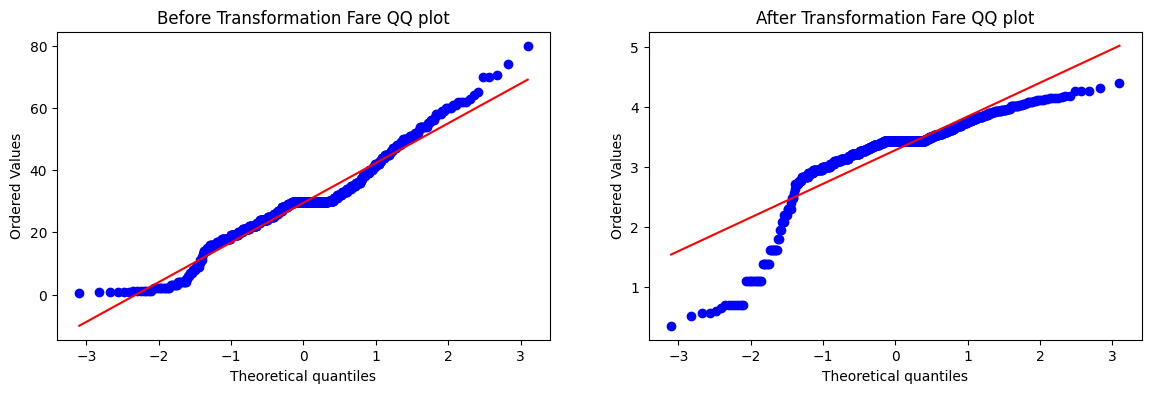

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Before Transformation Fare QQ plot')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('After Transformation Fare QQ plot')

plt.show()

away from normal dist bec it is not left skewed initally and we apply log transformation

# only Fare is log transformed check accuracy

In [20]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

clf111=LogisticRegression()
clf222 = DecisionTreeClassifier()

clf111.fit(X_train_transformed2,y_train)
clf222.fit(X_train_transformed2,y_train)

y_pred111=clf111.predict(X_test_transformed2)
y_pred222=clf222.predict(X_test_transformed2)

print("Accuracy of LR =",accuracy_score(y_test,y_pred111))
print("Accuracy of DT =",accuracy_score(y_test,y_pred222))

Accuracy of LR = 0.6703910614525139
Accuracy of DT = 0.6536312849162011


In [21]:
# cross validation

X_transformed2= trf.fit_transform(X)

clf1=LogisticRegression()
clf2 = DecisionTreeClassifier()

print("Accuracy of LR =",cross_val_score(clf1,X_transformed2,y,cv=5).mean())
print("Accuracy of DT =",cross_val_score(clf2,X_transformed2,y,cv=5).mean())

Accuracy of LR = 0.6780114242671521
Accuracy of DT = 0.6430983616847656


# QQ plot and Accuracy of different transform

In [35]:
def apply_transform(transform):
  X=df.iloc[:,1:3]
  y=df.iloc[:,0]

  trf = ColumnTransformer([('transform',FunctionTransformer(transform),['Fare'])], remainder='passthrough')

  X_train_transformed = trf.fit_transform(X)

  clf=LogisticRegression()


  print("Accuracy of LR =",cross_val_score(clf,X_train_transformed,y,cv=5).mean())




  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(X_train['Fare'], dist='norm', plot=plt)
  plt.title('Before Transformation Fare QQ plot')

  plt.subplot(122)
  stats.probplot(X_train_transformed[:,0], dist='norm', plot=plt)
  plt.title('After Transformation Fare QQ plot')

  plt.show()




Accuracy of LR = 0.6161634548992531


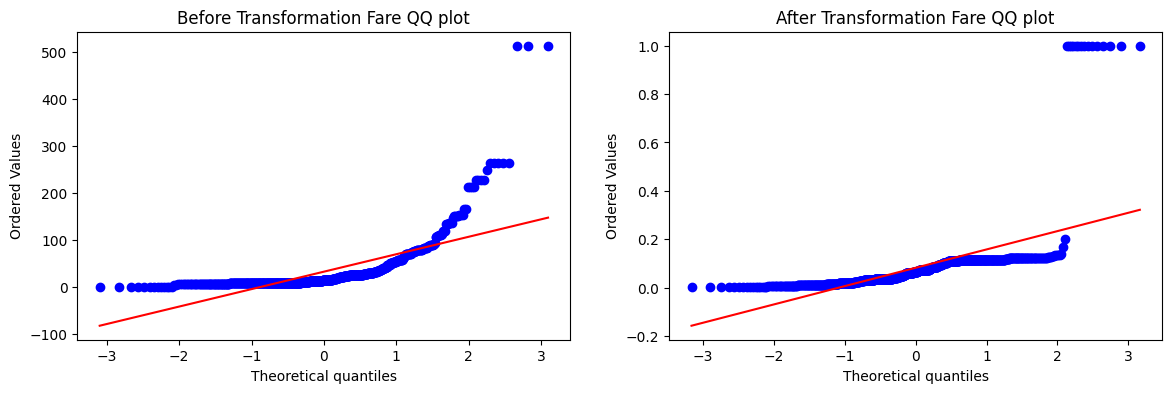

In [40]:
apply_transform(lambda x : 1/(x+1))